# Spatial Analysis in Geology using R

## by Pedro Nogueira

<span style="color:red;"> 
    <h1> 17. Working with satellites </h1>
</span>

In [1]:
#17-00
# Settings


# Print the R version information
print(R.version)

# Verify thw working directory
wd_base = getwd()
print(wd_base)

               _                           
platform       aarch64-apple-darwin20      
arch           aarch64                     
os             darwin20                    
system         aarch64, darwin20           
status                                     
major          4                           
minor          3.1                         
year           2023                        
month          06                          
day            16                          
svn rev        84548                       
language       R                           
version.string R version 4.3.1 (2023-06-16)
nickname       Beagle Scouts               
[1] "/Users/pnogasmacmini/Documents/Jupyter Notebooks/SAGR/Part II"


<span style="color:green;"> 
    <h2> 17.1. Satellite packages </h2>
</span>

<span style="color:green;"> 
    <h2> 17.2. Working with Sentinel images </h2>
</span>

In [3]:
# Define the working folder
setwd("/Users/pnogasmacmini/Documents/Jupyter Notebooks/SAGR//Rio Tinto Book/")

In [4]:
#17-01
# Load the Library
library(terra)

# Retrieve the tif files
files = list.files(pattern = ".tiff", full.names = TRUE)

# View the files
files

terra 1.7.55



[1] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B01_(Raw).tiff"  
 [2] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B02_(Raw).tiff"  
 [3] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B03_(Raw).tiff"  
 [4] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B04_(Raw).tiff"  
 [5] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B05_(Raw).tiff"  
 [6] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B06_(Raw).tiff"  
 [7] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B07_(Raw).tiff"  
 [8] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B08_(Raw).tiff"  
 [9] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B09_(Raw).tiff"  
[10] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B11_(Raw).tiff"  
[11] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B12_(Raw).tiff"  
[12] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_B8A_(Raw).tiff"  
[13] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_False_color.tiff"
[14] "./2023-07-20-00:00_2023-07-20-23:59_Sentinel-2_L2A_True_color.tiff"

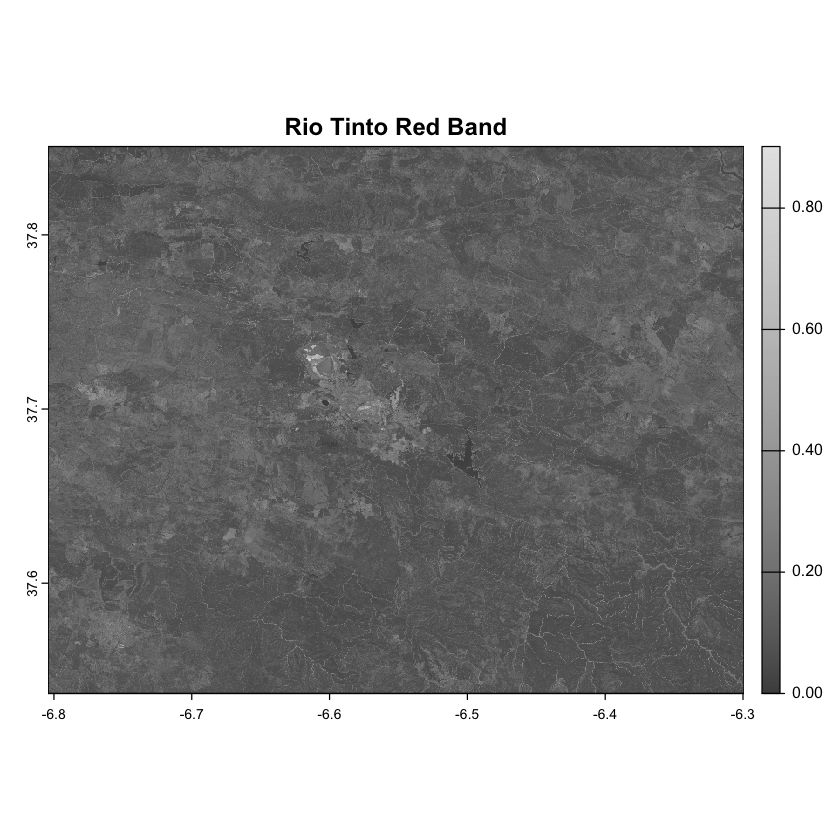

In [5]:
#17-02
# Load individual raster
RT_red = rast(files[4])

# Plot the greyscale Red Band
plot(RT_red, col=grey.colors(255), main = "Rio Tinto Red Band")

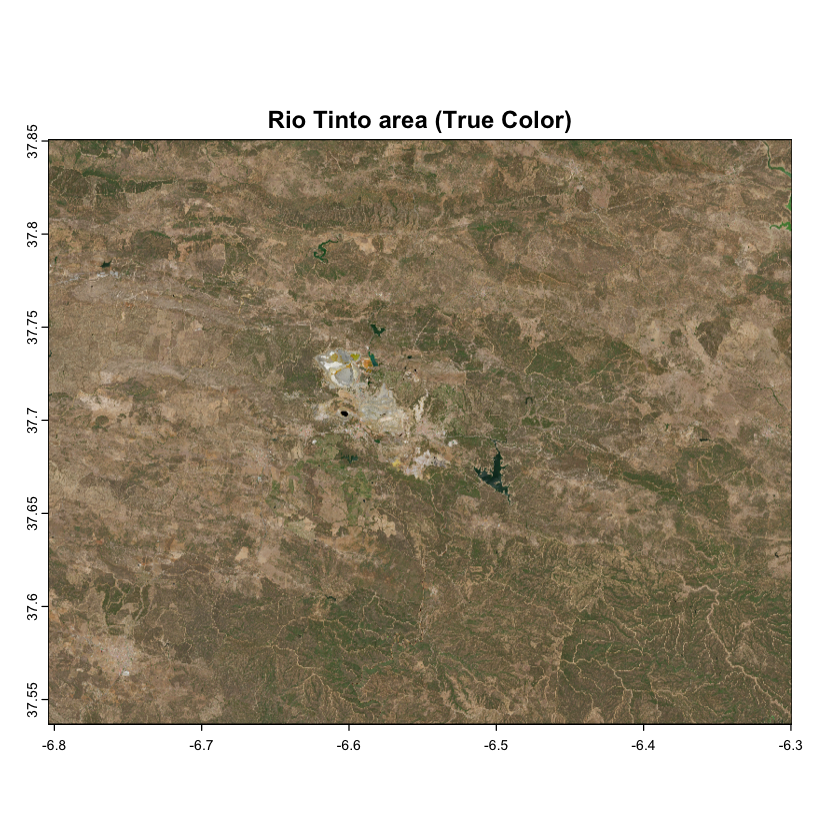

In [6]:
#17-03
# Load individual raster
RT_true = rast(files[14])

# Plot the raster composition using the plotRGB() function
plotRGB(RT_true, r=1, g=2, b=3, axes= T, mar=c(2,2,3,2), main ="Rio Tinto area (True Color)", scale = 1)

<span style="color:green;"> 
    <h2> 17.3. Working with Landsat-8 images </h2>
</span>

In [7]:
# Define working folder
setwd("/Users/pnogasmacmini/Documents/Jupyter Notebooks/SAGR/Landsat8/")

In [8]:
#17-04
# Retrieve the Band files
files = list.files(pattern = "_B", recursive = TRUE, full.names = TRUE)

# Verify the result
files

[1] "./LC08_L2SP_202034_20230125_20230208_02_T1/LC08_L2SP_202034_20230125_20230208_02_T1_SR_B1.TIF" 
[2] "./LC08_L2SP_202034_20230125_20230208_02_T1/LC08_L2SP_202034_20230125_20230208_02_T1_SR_B2.TIF" 
[3] "./LC08_L2SP_202034_20230125_20230208_02_T1/LC08_L2SP_202034_20230125_20230208_02_T1_SR_B3.TIF" 
[4] "./LC08_L2SP_202034_20230125_20230208_02_T1/LC08_L2SP_202034_20230125_20230208_02_T1_SR_B4.TIF" 
[5] "./LC08_L2SP_202034_20230125_20230208_02_T1/LC08_L2SP_202034_20230125_20230208_02_T1_SR_B5.TIF" 
[6] "./LC08_L2SP_202034_20230125_20230208_02_T1/LC08_L2SP_202034_20230125_20230208_02_T1_SR_B6.TIF" 
[7] "./LC08_L2SP_202034_20230125_20230208_02_T1/LC08_L2SP_202034_20230125_20230208_02_T1_SR_B7.TIF" 
[8] "./LC08_L2SP_202034_20230125_20230208_02_T1/LC08_L2SP_202034_20230125_20230208_02_T1_ST_B10.TIF"

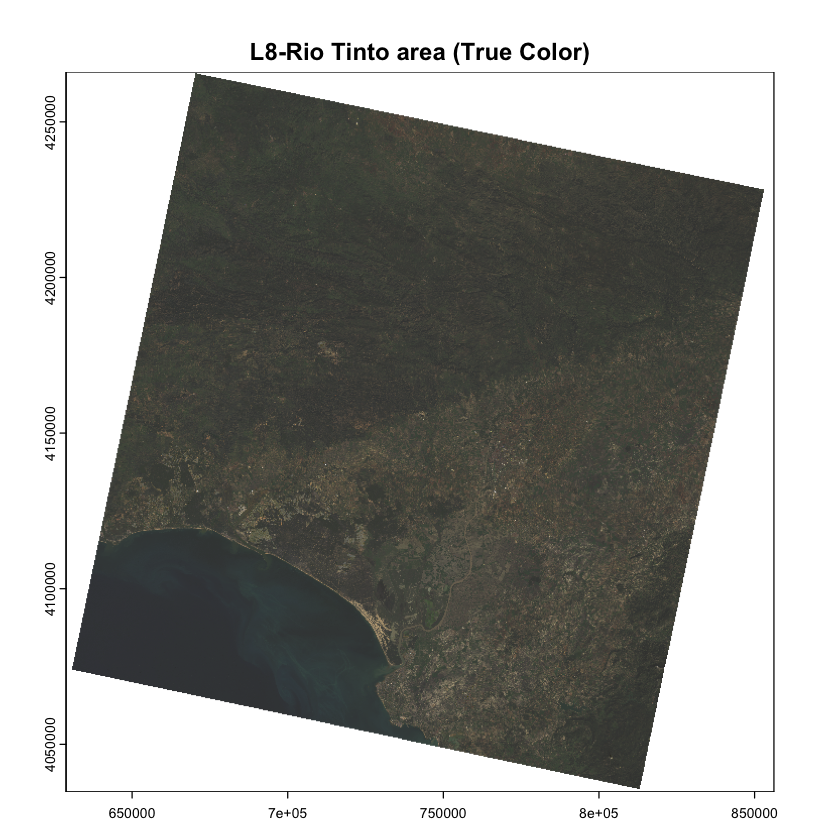

In [9]:
#17-05
# Load the RGB bands to create the image
RT_L8_rgb = rast(c(files[4],files[3],files[2] ))

# View the result
plotRGB(RT_L8_rgb, r=1, g=2, b=3, axes= T, mar=c(2,2,3,2), main ="L8-Rio Tinto area (True Color)")

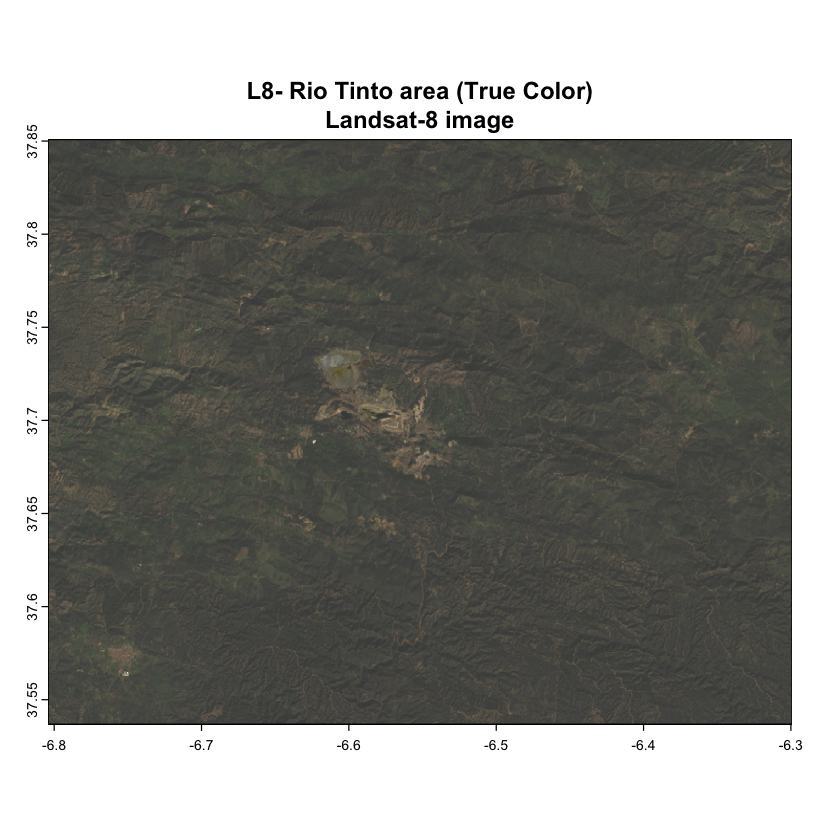

In [11]:
#17-06
# Load the RGB bands to create the image
RT_L8_full = rast(files)

# Reproject Landsat-8 image
RT_L8_full_wgs84 = project(RT_L8_full, "EPSG:4326")

# Crop Landsat-8 image
RT_L8_crop = crop(RT_L8_full_wgs84, RT_red)

# View the result
plotRGB(RT_L8_crop, r=4, g=3, b=2, axes= T, mar=c(2,2,3,2), 
        main ="L8- Rio Tinto area (True Color)\nLandsat-8 image")

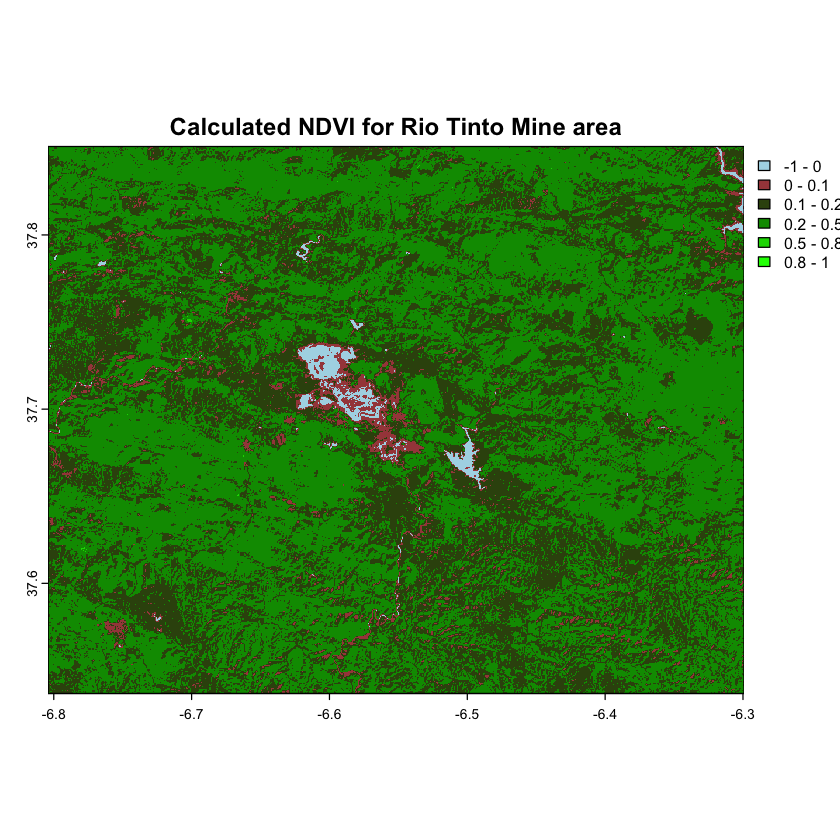

In [12]:
#17-07
# Define the NDVI bands
red = RT_L8_crop$LC08_L2SP_202034_20230125_20230208_02_T1_SR_B4
nir = RT_L8_crop$LC08_L2SP_202034_20230125_20230208_02_T1_SR_B5

# Calculate the NDVI Index
ndvi = (nir-red)/(nir + red)

# Define the NDVI values
ndvi_breaks = c(-1, 0, 0.1, 0.2, 0.5, 0.8, 1)

# Define the corresponding colors
colors = c("lightblue","brown", "darkgreen", "green3", "green2", "green")

# Create the color palette
ndviPalette = colorRampPalette(colors)

# View the result
plot(ndvi, col = ndviPalette(7), breaks= ndvi_breaks, main="Calculated NDVI for Rio Tinto Mine area")

<span style="color:blue;"> 
    <h1> References </h1>
</span>

Amils, R., González-Toril, E., Fernández-Remolar, D., Gómez, F., Aguilera, Á., Rodríguez, N., ... & Sanz, J. L. (2007). Extreme environments as Mars terrestrial analogs: The Rio Tinto case. Planetary
and Space Science, 55(3), 370-381.

Gómez-Ortiz, D., Fernández-Remolar, D. C., Granda, Á., Quesada, C., Granda, T., Prieto-Ballesteros, O., ... & Amils, R. (2014). Identification of the subsurface sulfide bodies responsible for acidity
in Río Tinto source water, Spain. Earth and Planetary Science Letters, 391, 36-41.

Leistel, J. M., Marcoux, E., Thiéblemont, D., Quesada, C., Sánchez, A., Almodóvar, G. R., ... & Saez, R. J. M. D. (1997). The volcanic-hosted massive sulphide deposits of the Iberian Pyrite Belt
Review and preface to the Thematic Issue: Review and preface to the Thematic Issue. Mineralium deposita, 33, 2-30.

Ranghetti, L.; Boschetti, M.; Nutini, F.; Busetto, L. (2020). sen2r: An R toolbox for automatically downloading and preprocessing Sentinel-2 satellite data. Computers & Geosciences, 139,
104473. doi: 10.1016/j.cageo.2020.104473, <a href="https://sen2r.ranghetti.info/">https://sen2r.ranghetti.info/ </a>.